<a href="https://colab.research.google.com/github/SaddamRafiq/Advanced-Statistics/blob/main/Advanced_Statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Basic Probabilities and Visualizations (1)**

In [ ]:
import numpy as np
from scipy.stats import nbinom

# Given values
k = 23  # Number of successes
p = 0.34  # Probability of success

# Generate x values (number of failures)
x_values = np.arange(0, 100)  # Range for relevant probabilities
pmf_values = nbinom.pmf(x_values, k, p)

# Calculate the cumulative distribution function (CDF) to find the median manually
cdf_values = nbinom.cdf(x_values, k, p)

# Find the smallest x for which the CDF is greater than or equal to 0.5
median_manual = x_values[cdf_values >= 0.5][0]
median_manual

44

**Graphical Representation:**

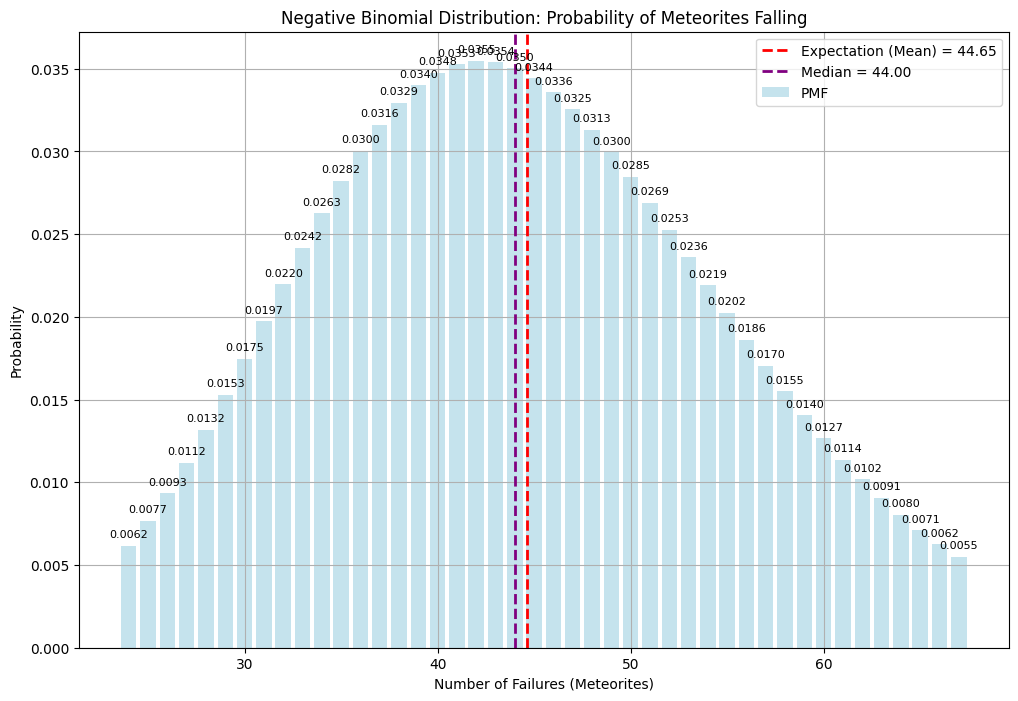

In [ ]:
import matplotlib.pyplot as plt
#Given values
k = 23  # Number of successes
p = 0.34  # Probability of success
threshold = 0.005  # Probability threshold (0.5%)

# Generate x values (number of failures)
x_values = np.arange(0, 100)  # Range for relevant probabilities
pmf_values = nbinom.pmf(x_values, k, p)

# Trim the x_values and pmf_values where the probability drops below 0.5%
x_values = x_values[pmf_values > threshold]
pmf_values = pmf_values[pmf_values > threshold]

# Calculate expectation (mean) and median
expectation = k * (1 - p) / p
median = nbinom.median(k, p)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(x_values, pmf_values, color='lightblue', alpha=0.7, label='PMF')

# Adding probability labels to each bar
for i in range(len(x_values)):
    plt.text(x_values[i], pmf_values[i] + 0.0005, f'{pmf_values[i]:.4f}', ha='center', fontsize=8)

# Plotting the expectation and median
plt.axvline(expectation, color='red', linestyle='--', linewidth=2, label=f'Expectation (Mean) = {expectation:.2f}')
plt.axvline(median, color='purple', linestyle='--', linewidth=2, label=f'Median = {median:.2f}')

# Adding labels and titles
plt.xlabel('Number of Failures (Meteorites)')
plt.ylabel('Probability')
plt.title('Negative Binomial Distribution: Probability of Meteorites Falling')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


# **Task 2: Basic Probabilities and Visualizations (2)**

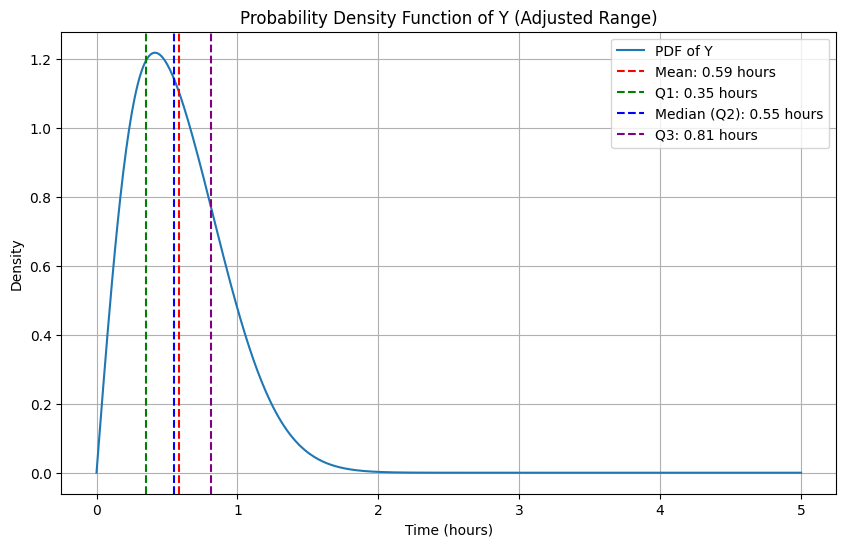

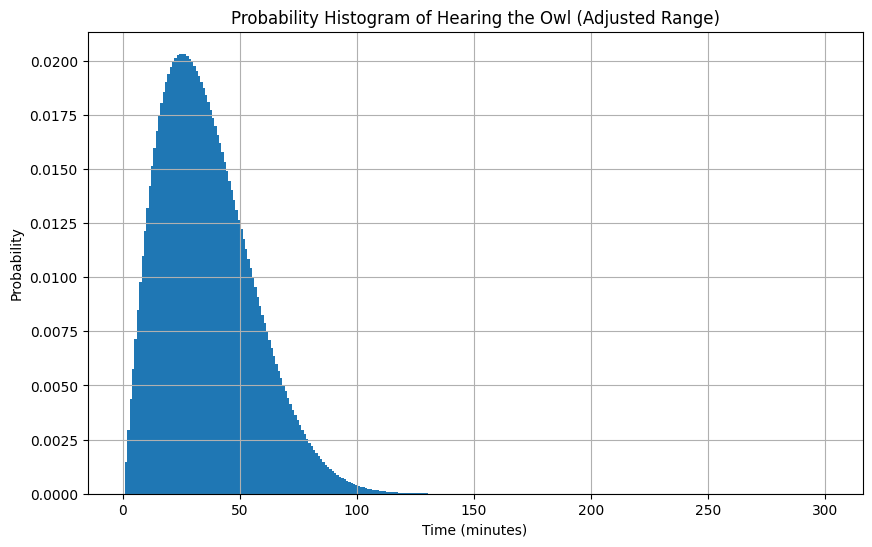

(0.0002952071125444591,
 0.5859243591949963,
 0.10700957175495221,
 [0.3507014028056112, 0.5511022044088176, 0.8116232464929859])

In [4]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

# Define the constants
xi5 = 0.11
xi6 = 8
xi7 = 0.88
xi8 = 2

# Define the PDF based on the provided survival function within a practical range
def pdf_y_adjusted(y):
    return 2 * y * (xi5 * xi6 * np.exp(-xi6 * y**2) + xi7 * xi8 * np.exp(-xi8 * y**2))

# Integrate the PDF over [2, 4] to find the probability P(2 <= Y <= 4)
probability_2_to_4, _ = quad(pdf_y_adjusted, 2, 4)

# Recalculate mean, variance, and quartiles within a finite range [0, 5] hours
mean_y_adjusted, _ = quad(lambda y: y * pdf_y_adjusted(y), 0, 5)
variance_y_adjusted, _ = quad(lambda y: (y - mean_y_adjusted)**2 * pdf_y_adjusted(y), 0, 5)

# Estimate quartiles numerically by cumulative integration
y_values = np.linspace(0, 5, 500)
cdf_values = np.array([quad(pdf_y_adjusted, 0, y)[0] for y in y_values])

# Extract quartiles
quartiles_adjusted = [y_values[np.searchsorted(cdf_values, q)] for q in [0.25, 0.5, 0.75]]

# Generate the PDF plot within the adjusted range
pdf_values_adjusted = pdf_y_adjusted(y_values)

plt.figure(figsize=(10, 6))
plt.plot(y_values, pdf_values_adjusted, label='PDF of Y')
plt.axvline(mean_y_adjusted, color='r', linestyle='--', label=f'Mean: {mean_y_adjusted:.2f} hours')
plt.axvline(quartiles_adjusted[0], color='g', linestyle='--', label=f'Q1: {quartiles_adjusted[0]:.2f} hours')
plt.axvline(quartiles_adjusted[1], color='b', linestyle='--', label=f'Median (Q2): {quartiles_adjusted[1]:.2f} hours')
plt.axvline(quartiles_adjusted[2], color='purple', linestyle='--', label=f'Q3: {quartiles_adjusted[2]:.2f} hours')
plt.title('Probability Density Function of Y (Adjusted Range)')
plt.xlabel('Time (hours)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Generate a histogram over [0, 5] hours, with 1-minute bins
minutes = np.linspace(0, 5, 300)  # 1-minute bins within 5 hours
minute_probs_adjusted = pdf_y_adjusted(minutes) * (1/60.0)  # Probability for each minute interval

plt.figure(figsize=(10, 6))
plt.bar(minutes * 60, minute_probs_adjusted, width=1.0, align='edge')
plt.title('Probability Histogram of Hearing the Owl (Adjusted Range)')
plt.xlabel('Time (minutes)')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

# Display the calculated values
probability_2_to_4, mean_y_adjusted, variance_y_adjusted, quartiles_adjusted,


# **Task 3: Transformed Random Variables**

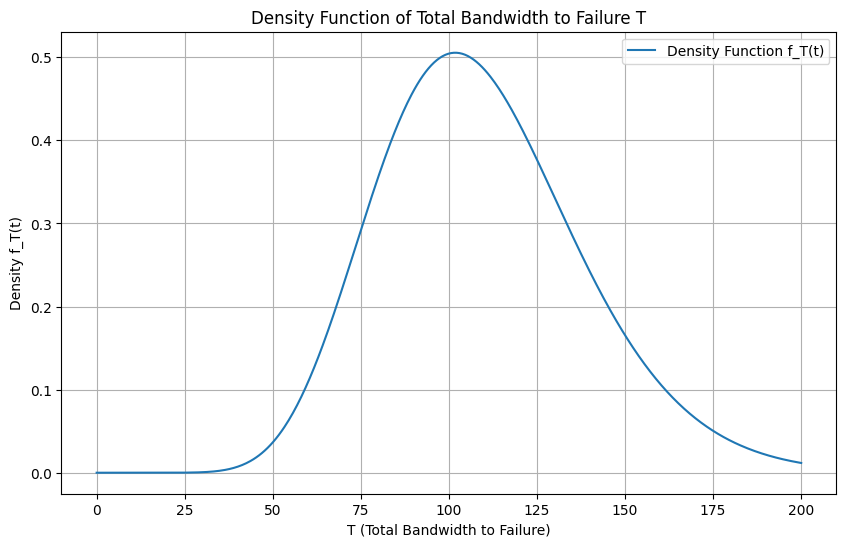

In [5]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Given parameters
theta = 7.83  # Estimated theta from MLE
xi9 = 2

# Define the individual density function f_S(s)
def f_S(s):
    return (1 / (120 * theta**7)) * s**6 * np.exp(-s / theta)

# Convolution integral to compute the density function f_T(t)
def f_T(t):
    integral_value, _ = quad(lambda s: f_S(s) * f_S(t - s), 0, t)
    return integral_value

# Generate a range of t values for plotting
t_values = np.linspace(0, 200, 500)
f_T_values = np.array([f_T(t) for t in t_values])

# Plot the density function f_T(t)
plt.figure(figsize=(10, 6))
plt.plot(t_values, f_T_values, label='Density Function f_T(t)')
plt.title('Density Function of Total Bandwidth to Failure T')
plt.xlabel('T (Total Bandwidth to Failure)')
plt.ylabel('Density f_T(t)')
plt.grid(True)
plt.legend()
plt.show()


In [6]:
import numpy as np
from scipy.special import gamma

# Given values
xi9 = 2
xi10 = np.array([22, 27, 106, 82, 37])

# Define the likelihood function's log component and compute MLE for theta
n = len(xi10)

# Calculating sum of T_i and log of T_i
sum_T = np.sum(xi10)
sum_log_T = np.sum(np.log(xi10))

# Since we're solving for theta, derive from the log-likelihood
theta_mle = sum_T / (7 * n)

# Calculate the expected value of T
k = 7  # shape parameter for Weibull distribution
expected_T = 2 * theta_mle * gamma(1 + 1/k)

# Output the MLE of theta and the expected value of T
theta_mle, expected_T


(7.828571428571428, 14.64627955614615)

# **Task 4: Hypothesis Test**

In [7]:
from scipy.stats import t
import numpy as np

# Given values
mu_0 = 812  # Historical mean
sample_weights = np.array([815, 796, 819, 774, 742, 760, 708, 827, 713, 822])
n = len(sample_weights)
alpha = 0.05  # Significance level

# Calculate sample mean and sample standard deviation
sample_mean = np.mean(sample_weights)
sample_std = np.std(sample_weights, ddof=1)  # ddof=1 for sample standard deviation

# Calculate the t-statistic
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Calculate the critical t-value for a one-tailed test
critical_t = t.ppf(1 - alpha, df=n-1)

# Decision rule
reject_null = t_statistic > critical_t

t_statistic, critical_t, reject_null, sample_mean, sample_std



(-2.401273051136055, 1.8331129326536335, False, 777.6, 45.30194992124143)

# **Task 5: Regularized Regression **



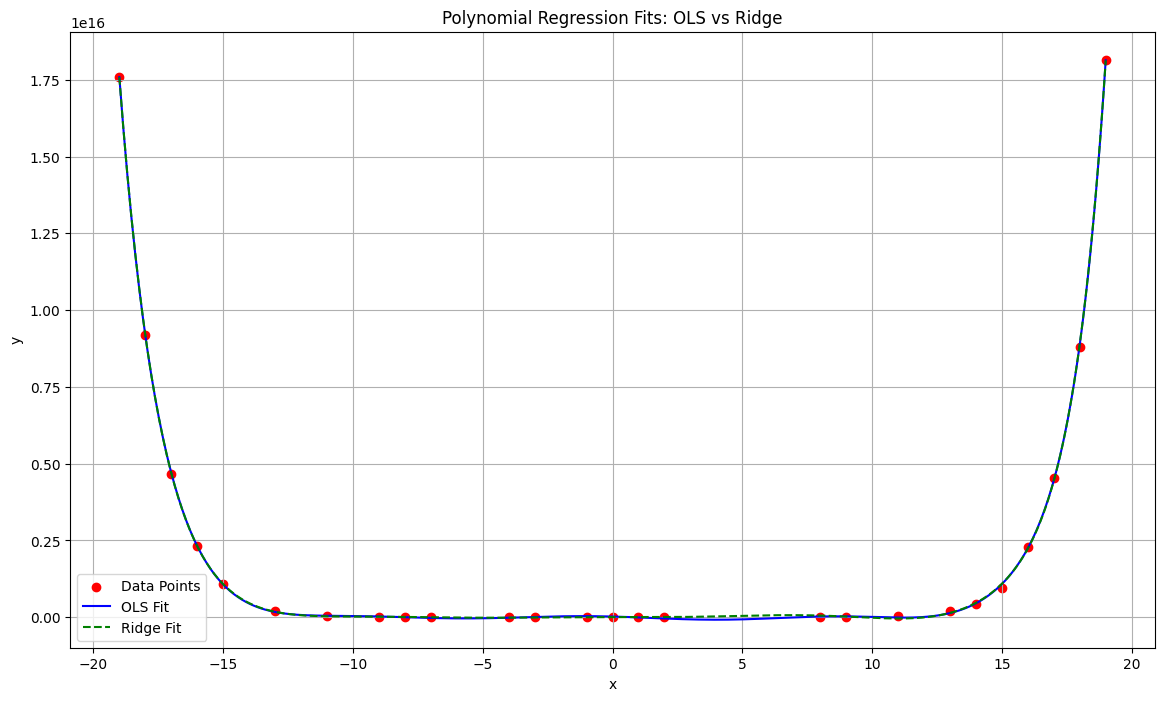

(array([ 2.06520478e+13, -2.20531501e+13, -8.23393641e+12,  1.14214498e+12,
         2.91676528e+11, -1.91468770e+10, -3.77676043e+09,  1.34945012e+08,
         2.21426386e+07, -4.18909948e+05, -5.96301558e+04,  4.70613921e+02,
         6.77802119e+01]),
 array([-6.91725932e+09, -1.38085468e+11, -6.36436630e+11,  5.08063824e+11,
         7.88988186e+10, -1.24608905e+10, -1.55989319e+09,  1.02045085e+08,
         1.13946645e+07, -3.42412685e+05, -3.50797757e+04,  4.02798468e+02,
         4.64226290e+01]))

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Design matrix X for a 12th-degree polynomial
X = np.vander(x, 13, increasing=True)

# Step 1: Calculate X^T X and X^T y
XtX = X.T @ X
Xty = X.T @ y

# Step 2: OLS estimate: (X^T X)^(-1) X^T y
XtX_inv = np.linalg.inv(XtX)
alpha_ols_manual = XtX_inv @ Xty

# Step 3: Ridge estimate: (X^T X + λI)^(-1) X^T y
lambda_val = 1e3
ridge_matrix = XtX + lambda_val * np.identity(XtX.shape[0])
ridge_matrix_inv = np.linalg.inv(ridge_matrix)
alpha_ridge_manual = ridge_matrix_inv @ Xty

# Generate points for visualization
x_plot = np.linspace(np.min(x), np.max(x), 500)
X_plot = np.vander(x_plot, 13, increasing=True)

# Predictions
y_ols_pred = X_plot @ alpha_ols_manual
y_ridge_pred = X_plot @ alpha_ridge_manual

# Plot the original data points
plt.figure(figsize=(14, 8))
plt.scatter(x, y, color='red', label='Data Points')

# Plot the OLS polynomial fit
plt.plot(x_plot, y_ols_pred, label='OLS Fit', color='blue')

# Plot the Ridge polynomial fit
plt.plot(x_plot, y_ridge_pred, label='Ridge Fit', color='green', linestyle='--')

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fits: OLS vs Ridge')
plt.legend()
plt.grid(True)
plt.show()

# Display calculated coefficients
alpha_ols_manual, alpha_ridge_manual



# **Task 6: Bayesian Estimates**

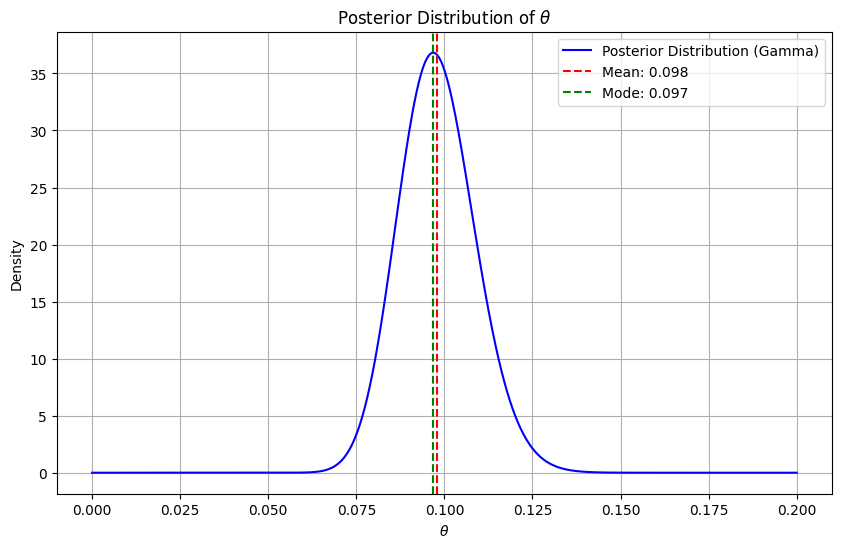

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Given parameters
alpha_post = 81
beta_post = 826.3

# Define the posterior distribution using the gamma distribution
theta_values = np.linspace(0, 0.2, 1000)
posterior_pdf = gamma.pdf(theta_values, alpha_post, scale=1/beta_post)

# Calculate mean and mode
theta_mean = alpha_post / beta_post
theta_mode = (alpha_post - 1) / beta_post

# Plotting the posterior distribution
plt.figure(figsize=(10, 6))
plt.plot(theta_values, posterior_pdf, label='Posterior Distribution (Gamma)', color='blue')
plt.axvline(theta_mean, color='red', linestyle='--', label=f'Mean: {theta_mean:.3f}')
plt.axvline(theta_mode, color='green', linestyle='--', label=f'Mode: {theta_mode:.3f}')
plt.xlabel(r'$\theta$')
plt.ylabel('Density')
plt.title(r'Posterior Distribution of $\theta$')
plt.legend()
plt.grid(True)
plt.show()

